# Phase 5 Project - Fast Tracking Media Intelligence


## Natural Language Processing Model for Text Summarization of CNN Daily News articles

Name: Andrew Levinton
Student Pace: Self Pace
Instructor name: Ahbhineet Kukarni

# Business Problem

In this study, we will be analyzing CNN-Daily Mail News Articles. Many companies want to keep track of the latest news trends and reading full length articles can be incredibly time consuming. With the way news headlines affect major business decisions such as legal matters and stock prices, its important that readers are able to obtain all the information and reasoning behind the purpose of these articles and many of them can have a large number of distractors. It's essential that companies that get this information have the ability to quickly analyze these articles and develop counter intel or reports of their own in order to stay current and relevant with today's media. In this study we take the first steps towards utilizing text summarization to fast track the information gathering and counter-reporting process. 


![daily_mail](./images/dailymail_cover.jpg)

# Business Understanding

## Description:

In today's information age, staying updated with news and information is crucial for both individuals and businesses. However, the sheer volume of news articles published daily can be overwhelming. Reading and processing these articles is time-consuming, especially when trying to gather insights from multiple sources.

To address this challenge, we propose the development of a text summarization model using natural language processing (NLP) techniques. This model will automatically generate concise and coherent summaries of news articles. Here's how it can benefit the public and support business decisions:

1. `Time Efficiency`: People often struggle to find the time to read lengthy news articles. Automated summarization allows individuals to quickly grasp the key points of an article, saving them time while keeping them informed.

2. `Enhanced Understanding`: Summaries provide a condensed version of the article, making complex topics more accessible to a wider audience. This can help people better understand important news and events.

3. `Multi-source Insights`: Readers can efficiently scan summaries from multiple sources to get a well-rounded view of a topic, fostering critical thinking and a broader perspective.

4. `Competitive Intelligence`: Businesses can use automated summarization to track news and developments in their industry, enabling them to stay ahead of competitors and adapt to market changes more effectively.

5. `Market Research`: Summarization can assist in analyzing customer sentiment, emerging trends, and competitor strategies by summarizing customer reviews, news, and social media posts.

6. `Content Curation`: Media companies and content aggregators can use summarization to curate content for their audience, improving user engagement and retention.


### Goals of this study:

1. Streamline and automate the understanding of complex news topics. 
2. Help track news developments to enhance market research.

### Business Questions to consider:

- What specific NLP techniques or models can be employed to automate the process of summarizing complex news articles effectively?
- How can automation be leveraged to provide real-time updates on important news developments to users or clients?
- Are there opportunities to use automation to personalize news content delivery based on individual user preferences and interests?
- How can automated summarization and analysis be integrated into other tools or platforms, such as news aggregators or chatbots?
- What are the critical news sources, categories, or keywords that have the most significant impact on market trends and consumer sentiment?

We will be using the CNN-Daily Mail News dataset to conduct our study. You can download the dataset from [here](https://www.kaggle.com/datasets/gowrishankarp/newspaper-text-summarization-cnn-dailymail)

In [46]:
#dataframe manipulation
import numpy as np
import pandas as pd 
import warnings

#plotting
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

#text preprocessing 
import re

from bs4 import BeautifulSoup
from keras.preprocessing.text import Tokenizer 
from keras_preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from gensim.parsing import strip_tags, strip_numeric, strip_multiple_whitespaces, stem_text, strip_punctuation, remove_stopwords
from gensim.parsing import preprocess_string
from gensim import parsing
import math

#modeling
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Attention
import warnings
pd.set_option("display.max_colwidth", 200)

#model performance
from rouge import Rouge
from collections import Counter

warnings.filterwarnings("ignore")



# Data Understanding
The CNN / DailyMail Dataset is an English-language dataset containing just over 300k unique news articles as written by journalists at CNN and the Daily Mail. The current version supports both extractive and abstractive summarization, though the original version was created for machine reading and comprehension and abstractive question answering.

The columns of the dataframe are:
1. `ID`- Unique ID of the article
2. `article` - The raw content of the article
3. `Highlights` - A summary of the article

# Preview of dataframe

In [47]:
df = pd.read_csv('test.csv')

df.head(3)

,id,article,highlights
0,92c514c913c0bdfe25341af9fd72b29db544099b,"Ever noticed how plane seats appear to be getting smaller and smaller? With increasing numbers of people taking to the skies, some experts are questioning if having such packed out planes is putti...",Experts question if packed out planes are putting passengers at risk .\nU.S consumer advisory group says minimum space must be stipulated .\nSafety tests conducted on planes with more leg room th...
1,2003841c7dc0e7c5b1a248f9cd536d727f27a45a,"A drunk teenage boy had to be rescued by security after jumping into a lions' enclosure at a zoo in western India. Rahul Kumar, 17, clambered over the enclosure fence at the Kamla Nehru Zoological...","Drunk teenage boy climbed into lion enclosure at zoo in west India .\nRahul Kumar, 17, ran towards animals shouting 'Today I kill a lion!'\nFortunately he fell into a moat before reaching lions an..."
2,91b7d2311527f5c2b63a65ca98d21d9c92485149,Dougie Freedman is on the verge of agreeing a new two-year deal to remain at Nottingham Forest. Freedman has stabilised Forest since he replaced cult hero Stuart Pearce and the club's owners are p...,Nottingham Forest are close to extending Dougie Freedman's contract .\nThe Forest boss took over from former manager Stuart Pearce in February .\nFreedman has since lead the club to ninth in the C...


## Sample Article and reference summary

To start, we look at a sample article from the dataframe of CNN articles, as well as its reference summary, labeled "highlights".

The purpose of the reference summary is to use it in helping determine how well our models perform in generating an effective summary. 

In this business case, the following objectives are important:

- `Content Extraction`: The model should accurately extract and prioritize key information from news articles, such as goal tallies, player performances, club interests, and tournament status, similar to what is done in the reference summary.

- `Conciseness`: The generated summaries should be concise, avoiding unnecessary details and providing the most important facts. This is crucial for creating efficient news feed content and trend analysis.

- `Relevance`: The model should focus on relevant and impactful information to meet the needs of the business case, ensuring that the summaries provide insights that matter.

- `Structure`: The generated summaries should be well-structured, possibly using bullet points or other formatting techniques to enhance readability and quick comprehension.

- `Clarity`: The language used in the summaries should be clear and understandable, making the information accessible to a wide audience, including those who may not be experts in the field.

- `Performance Measurement`: The success of the model can be measured by comparing the generated summaries to reference summaries, just as in your current approach, to assess how effectively it condenses the content and provides valuable insights.

Ultimately, the desired outcome is to have a summarization model that can efficiently and accurately produce news feed content and trend analysis summaries from public news articles, in a manner that aligns with the characteristics and quality of the reference summary you've provided.




In [48]:
df['article'][1000]

"Cristiano Ronaldo and Lionel Messi will go head-to-head once more in the race to be this season's top scorer in the Champions League – although Luiz Adriano threatens to spoil the party. Both Barcelona and Real Madrid booked their spots in the semi-finals this week with victories over Paris Saint-Germain and Atletico Madrid respectively. The planet's best footballers have scored eight times in Europe this season. But Shakhtar Donetsk’s Adriano, courted by Arsenal and Liverpool, has netted on nine occasions this term. Cristiano Ronaldo, in action against Atletico Madrid on Wednesday evening, has scored eight goals in Europe . Lionel Messi also has eight goals in the Champions League this term; one fewer than Luiz Adriano . Ronaldo and Messi will both play at least two more times after Real Madrid and Barcelona reached the last four . Adriano, who moved to Donetsk in 2007, scored five against BATE Borsiov in the group stages. His performance that night made history, with the 27-year-old

# Sample Highlight

In [49]:
df['highlights'][1000]

"Luiz Adriano scored nine times for Shakhtar Donetsk in Europe this season .\nThe Brazilian is out of contract at the end of the year... both Arsenal and Liverpool are interested in signing the 27-year-old .\nCristiano Ronaldo and Lionel Messi have netted eight goals this season .\nReal Madrid and Barcelona both in the Champions League semi-finals .\nREAD: Our reporters have their say on who will win the Champions League .\nCLICK HERE for Sportsmail's guide to the Champions League final four ."

-The reference summary provided for the sample article appears to be a good representation of the article from a business case perspective for a text summarization model **aiming to extract key information from news articles**. Here's why its a good benchmark for achievement of our model:

- `Key Information Extraction`: The reference summary effectively extracts and condenses the most important information from the article. It mentions the number of goals scored by Luiz Adriano and the interest from Arsenal and Liverpool. It also highlights the goal tally of Cristiano Ronaldo and Lionel Messi, as well as the fact that both Real Madrid and Barcelona are in the Champions League semi-finals. This information encapsulates the main points of interest in the article.

- `Conciseness`: The reference summary is concise and to the point. It does not contain unnecessary details or filler content, which is crucial for generating news feed content and trends analysis where brevity is key.

- `Relevance`: The reference summary includes information that is directly relevant to the business case, such as the goals scored, contract status, and the interest of major football clubs. This relevance is essential for providing valuable insights.

- `Structure`: The summary is well-structured, with bullet points that make it easy to skim and understand the main points quickly. This is important for generating news feed content that needs to be quickly digestible.

- `Clarity`: The language used in the reference summary is clear and easy to understand, ensuring that the extracted information is accessible to a broad audience.

## Checking for length and nulls

Checking the length of a DataFrame is a fundamental step in data analysis and manipulation. It provides valuable information about the data's size, which can be used for data validation, sampling, indexing, transformation, and various analytical tasks. Understanding the length of your data is a crucial aspect of effective data handling and analysis.

Checking for nulls in data is crucial for maintaining data quality, ensuring accurate analyses, supporting machine learning models, enabling data imputation, and making informed decisions.

In [50]:
len(df)

11490

In [51]:
df.isnull().sum()

id            0
article       0
highlights    0
dtype: int64

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11490 entries, 0 to 11489
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          11490 non-null  object
 1   article     11490 non-null  object
 2   highlights  11490 non-null  object
dtypes: object(3)
memory usage: 269.4+ KB


# Getting the word count
The purpose of the code below is to provide a quantitative measure of the word count for each article in the DataFrame. Knowing the word count of each article can be valuable for various natural language processing tasks, such as text summarization, where you might want to generate a concise summary of the content while preserving essential information or meeting a specific length requirement. By having the word count readily available in the 'WordCount' column, you can make informed decisions and apply algorithms or methods that take the length of the text into account during the summarization process, ensuring that the generated summaries are of an appropriate length.


After we generate the word count we will:

- Look at distribution
- Look at general statistics like the mean and median to analyze the general text length

In [53]:
# Function to count words in a text column
def count_words(text):
    words = text.split()
    return len(words)

# Apply the function to the DataFrame column
df['articleWordCount'] = df['article'].apply(count_words)
df['highlightsWordCount'] = df['highlights'].apply(count_words)
df.head()

,id,article,highlights,articleWordCount,highlightsWordCount
0,92c514c913c0bdfe25341af9fd72b29db544099b,"Ever noticed how plane seats appear to be getting smaller and smaller? With increasing numbers of people taking to the skies, some experts are questioning if having such packed out planes is putti...",Experts question if packed out planes are putting passengers at risk .\nU.S consumer advisory group says minimum space must be stipulated .\nSafety tests conducted on planes with more leg room th...,370,36
1,2003841c7dc0e7c5b1a248f9cd536d727f27a45a,"A drunk teenage boy had to be rescued by security after jumping into a lions' enclosure at a zoo in western India. Rahul Kumar, 17, clambered over the enclosure fence at the Kamla Nehru Zoological...","Drunk teenage boy climbed into lion enclosure at zoo in west India .\nRahul Kumar, 17, ran towards animals shouting 'Today I kill a lion!'\nFortunately he fell into a moat before reaching lions an...",311,38
2,91b7d2311527f5c2b63a65ca98d21d9c92485149,Dougie Freedman is on the verge of agreeing a new two-year deal to remain at Nottingham Forest. Freedman has stabilised Forest since he replaced cult hero Stuart Pearce and the club's owners are p...,Nottingham Forest are close to extending Dougie Freedman's contract .\nThe Forest boss took over from former manager Stuart Pearce in February .\nFreedman has since lead the club to ninth in the C...,110,35
3,caabf9cbdf96eb1410295a673e953d304391bfbb,"Liverpool target Neto is also wanted by PSG and clubs in Spain as Brendan Rodgers faces stiff competition to land the Fiorentina goalkeeper, according to the Brazilian's agent Stefano Castagna. Th...","Fiorentina goalkeeper Neto has been linked with Liverpool and Arsenal .\nNeto joined Firoentina from Brazilian outfit Atletico Paranaense in 2011 .\nHe is also wanted by PSG and Spanish clubs, acc...",308,44
4,3da746a7d9afcaa659088c8366ef6347fe6b53ea,"Bruce Jenner will break his silence in a two-hour interview with Diane Sawyer later this month. The former Olympian and reality TV star, 65, will speak in a 'far-ranging' interview with Sawyer for...","Tell-all interview with the reality TV star, 69, will air on Friday April 24 .\nIt comes amid continuing speculation about his transition to a woman and following his involvement in a deadly car c...",749,61


In [54]:
df['articleWordCount'].describe()['mean']

683.5115752828547

In [55]:
df['highlightsWordCount'].describe()['mean']

55.00931244560488

The average token count for the articles and the highlights are provided below:



| Feature      | Mean Token Count |
|--------------|------------------|
| Article      | 683              |
| Highlights   | 55               |


# Understanding the distribution of the sequences
Here, we will analyze the length of the reviews and the summary to get an overall idea about the distribution of length of the text. This will help us fix the maximum length of the sequence:

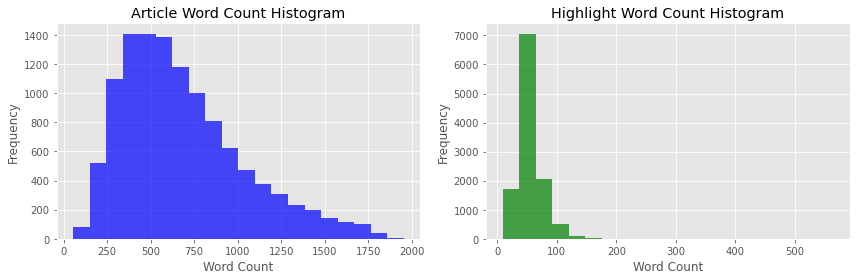

In [56]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))


ax1.hist(df['articleWordCount'], bins=20, color='blue', alpha=0.7)
ax1.set_title('Article Word Count Histogram')
ax1.set_xlabel('Word Count')
ax1.set_ylabel('Frequency')


ax2.hist(df['highlightsWordCount'], bins=20, color='green', alpha=0.7)
ax2.set_title('Highlight Word Count Histogram')
ax2.set_xlabel('Word Count')
ax2.set_ylabel('Frequency')


plt.tight_layout()


plt.show()

# Data Preparation

Performing basic preprocessing steps is very important before we get to the model building part. Using messy and uncleaned text data is a potentially disastrous move. So in this step, we will drop all the unwanted symbols, characters, etc. from the text that do not affect the objective of our problem.

Here is the dictionary that we will use for expanding the contractions:

## Contraction Mapping
A contraction mapping, also known as a "contraction operator" or "contraction function," is a concept from mathematics, specifically in the field of functional analysis. In the context of text summarization, it's not directly used, but related concepts and techniques from mathematics and natural language processing can be applied to improve the quality of text summarization models.

In [57]:
contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",
                           "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",
                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",
                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",
                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",
                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",
                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",
                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",
                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",
                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",
                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",
                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",
                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",
                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",
                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",
                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",
                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",
                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",
                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",
                           "you're": "you are", "you've": "you have"}

We will perform the below preprocessing tasks for our data:

1.Convert everything to lowercase

2.Remove HTML tags

3.Contraction mapping

4.Remove (‘s)

5.Remove any text inside the parenthesis ( )

6.Eliminate punctuations and special characters

7.Remove stopwords

8.Remove short words

Let’s define the function:

#### Text Cleaner
This code block performs text preprocessing tasks such as lowercasing, HTML tag removal, parentheses and quotation marks removal, contraction expansion, possessive form removal, and non-alphabetic character removal. It also offers the option to remove common stopwords and short words, resulting in cleaner and more structured text data for analysis.

In [58]:
stop_words = set(stopwords.words('english')) 
stop_words.update(['daily', 'news', 'mail'])
def text_cleaner(text,num):
    newString = text.lower()
    newString = BeautifulSoup(newString, "lxml").text
    newString = re.sub(r'\([^)]*\)', '', newString)
    newString = re.sub('"','', newString)
    newString = ' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in newString.split(" ")])    
    newString = re.sub(r"'s\b","",newString)
    newString = re.sub("[^a-zA-Z]", " ", newString) 
    newString = re.sub('[m]{2,}', 'mm', newString)
    if(num==0):
        tokens = [w for w in newString.split() if not w in stop_words]
    else:
        tokens=newString.split()
    long_words=[]
    for i in tokens:
        if len(i)>1:                                                 #removing short word
            long_words.append(i)   
    return (" ".join(long_words)).strip()

## Applying the function to the dataframe articles

In [59]:
#call the function
cleaned_text = []
for t in df['article']:
    cleaned_text.append(text_cleaner(t,0)) 

## Sample cleaned articles

In [60]:
print('Here is a sample of what the articles look like after cleaning:')
print('\n')
print('Article 1: ')
print(cleaned_text[0])
print('\n')
print('Article 2: ')
print(cleaned_text[1])

Here is a sample of what the articles look like after cleaning:


Article 1: 
ever noticed plane seats appear getting smaller smaller increasing numbers people taking skies experts questioning packed planes putting passengers risk say shrinking space aeroplanes uncomfortable putting health safety danger squabbling arm rest shrinking space planes putting health safety danger week consumer advisory group set department transportation said public hearing government happy set standards animals flying planes stipulate minimum amount space humans world animals rights space food humans said charlie leocha consumer representative committee time dot faa take stand humane treatment passengers could crowding planes lead serious issues fighting space overhead lockers crashing elbows seat back kicking tests conducted faa use planes inch pitch standard airlines decreased many economy seats united airlines inches room airlines offer little inches cynthia corbertt human factors researcher federal avia

## Applying the same function to the dataframe highlights:

In [61]:
#call the function
cleaned_summary = []
for t in df['highlights']:
    cleaned_summary.append(text_cleaner(t,1))

In [62]:
print('Here is a sample of what the summaries look like after cleaning:')
print('\n')
print('Highlight 1: ')
print(cleaned_summary[0])
print('\n')
print('Highlight 2: ')
print(cleaned_summary[1])

Here is a sample of what the summaries look like after cleaning:


Highlight 1: 
experts question if packed out planes are putting passengers at risk consumer advisory group says minimum space must be stipulated safety tests conducted on planes with more leg room than airlines offer


Highlight 2: 
drunk teenage boy climbed into lion enclosure at zoo in west india rahul kumar ran towards animals shouting today kill lion fortunately he fell into moat before reaching lions and was rescued


In [63]:
df['cleaned_text']=cleaned_text
df['cleaned_summary']=cleaned_summary

# Drop empty rows

In [64]:
df.replace('', np.nan, inplace=True)
df.dropna(axis=0,inplace=True)

## Analyzing the length of the highlights
The purpose the code below is to analyze and gain insights into the distribution of summary lengths within a dataset. By iterating through the 'cleaned_summary' column of the DataFrame and checking the number of words in each cleaned summary, the code helps identify how many of these summaries are concise, containing 75 words or less. This analysis is valuable in various natural language processing and text analysis tasks, such as text summarization or information retrieval, as it provides an understanding of the dataset's summarization patterns. Furthermore, it allows data practitioners to assess the suitability of the dataset for specific applications that may have constraints on summary length.

In [65]:
cnt=0
for i in df['cleaned_summary']:
    if(len(i.split())<=75):
        cnt=cnt+1
print(cnt/len(df['cleaned_summary']))

0.9079199303742385


We observe that 91% of the highlights have length below 75. So, we can fix maximum length of summary to 75.

Let us fix the maximum length of an article to 750

In [66]:
cnt=0
for i in df['cleaned_text']:
    if(len(i.split())<=750):
        cnt=cnt+1
print(cnt/len(df['cleaned_text']))

0.9485639686684073


We observe that 95% of the articles have length below 750. So, we can fix maximum length of summary to 750.

In [67]:
max_text_len=750
max_summary_len=75

The purpose of the code below is to filter and create a new dataset (data) that contains text and summary pairs where both the text and summary have lengths within certain limits (max_summary_len and max_text_len). This can be useful when working with text summarization tasks or other natural language processing applications where controlling the length of input and output sequences is important. The resulting data DataFrame can be used for training, validation, or testing in machine learning models or other text analysis tasks.

In [68]:
cleaned_text =np.array(df['cleaned_text'])
cleaned_summary=np.array(df['cleaned_summary'])

short_text=[]
short_summary=[]

for i in range(len(cleaned_text)):
    if(len(cleaned_summary[i].split())<=max_summary_len and len(cleaned_text[i].split())<=max_text_len):
        short_text.append(cleaned_text[i])
        short_summary.append(cleaned_summary[i])
        
data=pd.DataFrame({'article':short_text,'highlights':short_summary})

In [69]:
data.head()

,article,highlights
0,ever noticed plane seats appear getting smaller smaller increasing numbers people taking skies experts questioning packed planes putting passengers risk say shrinking space aeroplanes uncomfortabl...,experts question if packed out planes are putting passengers at risk consumer advisory group says minimum space must be stipulated safety tests conducted on planes with more leg room than airlines...
1,drunk teenage boy rescued security jumping lions enclosure zoo western india rahul kumar clambered enclosure fence kamla nehru zoological park ahmedabad began running towards animals shouting woul...,drunk teenage boy climbed into lion enclosure at zoo in west india rahul kumar ran towards animals shouting today kill lion fortunately he fell into moat before reaching lions and was rescued
2,dougie freedman verge agreeing new two year deal remain nottingham forest freedman stabilised forest since replaced cult hero stuart pearce club owners pleased job done city ground dougie freedman...,nottingham forest are close to extending dougie freedman contract the forest boss took over from former manager stuart pearce in february freedman has since lead the club to ninth in the championship
3,liverpool target neto also wanted psg clubs spain brendan rodgers faces stiff competition land fiorentina goalkeeper according brazilian agent stefano castagna reds linked move year old whose cont...,fiorentina goalkeeper neto has been linked with liverpool and arsenal neto joined firoentina from brazilian outfit atletico paranaense in he is also wanted by psg and spanish clubs according to hi...
4,bruce jenner break silence two hour interview diane sawyer later month former olympian reality tv star speak far ranging interview sawyer special edition friday april abc announced monday intervie...,tell all interview with the reality tv star will air on friday april it comes amid continuing speculation about his transition to woman and following his involvement in deadly car crash in februar...


In [70]:
data['article'][1000]

'panama city handshake shook western hemisphere president obama briefly met cuban counterpart raul castro friday night dinner dozens latin american leaders convening panama city summit americas historic two nations barely speaking terms officially years meeting important bernadette meehan national security council spokesperson issued statement summit americas evening president obama president castro greeted shook hands cuba united states endured half century enmity tension worsened two nations miles apart key events years include traumatic modern history cuban missile crisis bay pigs mariel boatlift two leaders building historic face face obama spoke phone wednesday cuban leader heading panama met friday dinner expected spend lot time together saturday summit begins earnest obama arrived panama late thursday conference years past tinged animosity cuba exclusion moments marine one obama helicopter touched panama city castro plane landed tarmac panamanian television carried arrivals live

In [71]:
data['highlights'][1000]

'president obama cuban president raul castro meet in panama city the two nations only miles apart have been at odds for more than years'

# Analyzing n-grams - Articles

In [72]:
X = df['cleaned_text']
y = df.drop('cleaned_text', axis=1)

In [73]:
cv = CountVectorizer(ngram_range = (3,3))
X_count = cv.fit_transform(X)
X_count  = pd.DataFrame.sparse.from_spmatrix(X_count)
X_count.columns = sorted(cv.vocabulary_)
X_count.set_index(y.index, inplace=True)

all_tri_labels = X_count.sum().sort_values(ascending = False)[0:30]

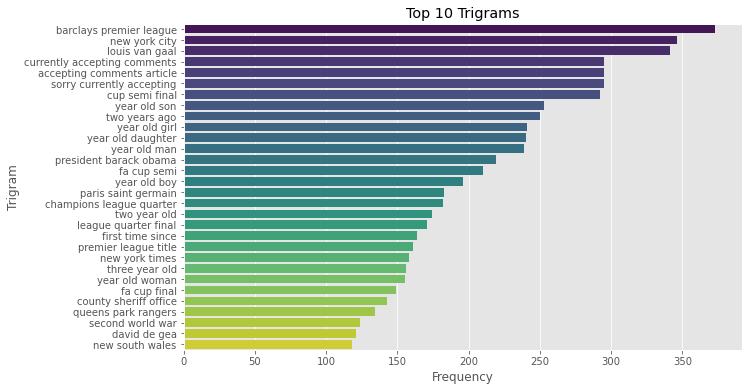

In [74]:
# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=all_tri_labels.values, y=all_tri_labels.index, palette='viridis')

# Set plot labels and title
plt.xlabel('Frequency')
plt.ylabel('Trigram')
plt.title('Top 10 Trigrams')

# Display the plot
plt.show()

# Analyzing n-grams - Highlights

In [75]:
X = df['cleaned_summary']
y = df.drop('cleaned_summary', axis=1)

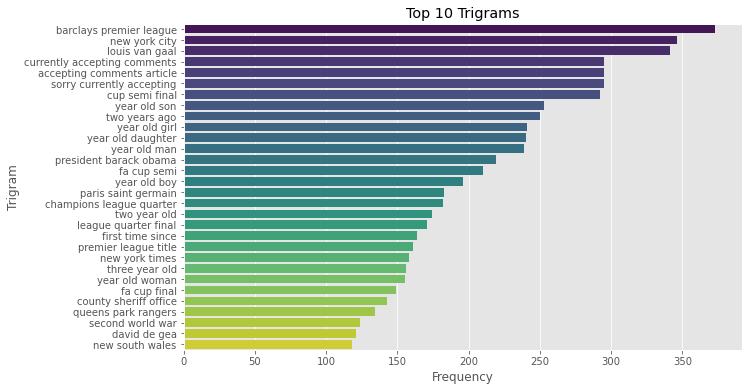

In [76]:
# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=all_tri_labels.values, y=all_tri_labels.index, palette='viridis')

# Set plot labels and title
plt.xlabel('Frequency')
plt.ylabel('Trigram')
plt.title('Top 10 Trigrams')

# Display the plot
plt.show()

# Model building

# Baseline - TFIDF Vectorizer 

[TFIDF](https://medium.com/@ashins1997/text-summarization-f2542bc6a167#:~:text=Sentence%20scoring%20using%20tf%2Didf,word%20occurs%20in%20the%20document.)

- **Sentence scoring using tf-idf is one of the extractive approaches for text summarization.** 
- **TF-IDF stands for Term Frequency** — Inverse Document Frequency. It is the product of two statistics.

- **Term Frequency (TF)** : It is the number of times the word occurs in the document.
- **Inverse Document Frequency (IDF)** : It is the measure of how much information the word provides, i.e., if it’s common or rare across all documents.

# Functions for steps in model building

1. Covert text to sentences : Converting a single text to list of sentences.
2. Pre-process text : Clean the sentences by removing unnecessary words, stopwords, punctuations, etc.
3. Create term frequency (tf) matrix : It shows the frequency of words in each sentence. We will calculate relative frequency to represent the tf instead of using actual frequency. 
>It is calculated as t / T where,
> - t = Number of times the term appears in the document,
> - T = Total number of terms in the document
4. Create idf matrix : It shows the importance of words in each sentence with respect to the whole document. 
> It is calculated as log_e(D/d) where,
> - D = Total number of documents,
> - d = Number of documents with term t in it
5. Calculate sentence tf-idf : It is the product of tf and idf for each word in the sentence and shows the importance of each word in the sentence.
6. Calculate sentence scores : Here score of the sentences are calculated as the average of the tf-idf value of words in the sentence. It is calculated as
> T / n where,
> - T = Total tf-idf of words in the sentence,
> - n = Number of distinct words in the sentence
7. Determine threshold : Threshold is the average value of the scores of the sentences. 
> It is calculated as S / s where,
> - S = Total sum of scores of sentences,
> - s = Number of sentences
8. Generate summary : Generate a summary by extracting the sentences having scores greater than the threshold value.

In [77]:
# 1.Convert text to sentences
text = df['article'][1000]
sentences = sent_tokenize(text)

# Preprocess Text
ps = PorterStemmer()
def text_preprocessing(sentences):
    """
    Pre processing text to removeunnecessary words.
    """    
#     print('Preprocessing text')    
    stop_words = set(stopwords.words('english'))
    clean_words = []
    for sent in sentences:
        words = word_tokenize(sent)
        words = [ps.stem(word.lower()) for word in words if word.isalnum()]
        clean_words += [word for word in words if word not in stop_words]
    return clean_words

# 3.Create term frequency (tf) matrix

def create_tf_matrix(sentences: list) -> dict:
    """
    Here document refers to a sentence.
    TF(t) = (Number of times the term t appears in a document) /         (Total number of terms in the document)
    """
#     print('Creating tf matrix.')
    tf_matrix = {}
    for sentence in sentences:
        tf_table = {}
        words_count = len(word_tokenize(sentence))
        clean_words = text_preprocessing([sentence])
        # Determining frequency of words in the sentence
        word_freq = {}
        for word in clean_words:
            word_freq[word] = (word_freq[word] + 1) if word in  word_freq else 1
        # Calculating tf of the words in the sentence
        for word, count in word_freq.items():
            tf_table[word] = count / words_count
        tf_matrix[sentence[:15]] = tf_table
    return tf_matrix

# 4.Create idf matrix

def create_idf_matrix(sentences: list) -> dict:
    """
    IDF(t) = log_e(Total number of documents / Number of documents     with term t in it)
    """
#     print('Creating idf matrix.')

    idf_matrix = {}

    documents_count = len(sentences)
    sentence_word_table = {}

    # Getting words in the sentence
    for sentence in sentences:
        clean_words = text_preprocessing([sentence])
        sentence_word_table[sentence[:15]] = clean_words

    # Determining word count table with the count of sentences which contains the word.
    word_in_docs = {}
    for sent, words in sentence_word_table.items():
        for word in words:
            word_in_docs[word] = (word_in_docs[word] + 1) if word in word_in_docs else 1

    # Determining idf of the words in the sentence.
    for sent, words in sentence_word_table.items():
        idf_table = {}
        for word in words:
            idf_table[word] = math.log10(documents_count / float(word_in_docs[word]))

        idf_matrix[sent] = idf_table

    return idf_matrix

# 5.Calculate sentence tf-idf

def create_tf_idf_matrix(tf_matrix, idf_matrix) -> dict:
    """
    Create a tf-idf matrix which is multiplication of tf * idf individual words
    """
#     print('Calculating tf-idf of sentences.')

    tf_idf_matrix = {}

    for (sent1, f_table1), (sent2, f_table2) in zip(tf_matrix.items(), idf_matrix.items()):
        tf_idf_table = {}

        for (word1, value1), (word2, value2) in zip(f_table1.items(), f_table2.items()):
            tf_idf_table[word1] = float(value1 * value2)

        tf_idf_matrix[sent1] = tf_idf_table

    return tf_idf_matrix

# 6.Calculate sentence scores

def create_sentence_score_table(tf_idf_matrix) -> dict:
    """
    Determining average score of words of the sentence with its words tf-idf value.
    """
#     print('Creating sentence score table.')

    sentence_value = {}

    for sent, f_table in tf_idf_matrix.items():
        total_score_per_sentence = 0

        count_words_in_sentence = len(f_table)
        
        # Check if count_words_in_sentence is not zero
        if count_words_in_sentence != 0:
            for word, score in f_table.items():
                total_score_per_sentence += score

            sentence_value[sent] = total_score_per_sentence / count_words_in_sentence
        else:
            sentence_value[sent] = 0  # Set the score to 0 for empty sentences

    return sentence_value

# 7.Determine threshold
def find_average_score(sentence_value):
    """
    Calculate average value of a sentence form the sentence score table.
    """
#     print('Finding average score')

    sum = 0
    for val in sentence_value:
        sum += sentence_value[val]

    average = sum / len(sentence_value)

    return average


# 8.Generate summary

def generate_summary(sentences, sentence_value, threshold):
    """
    Generate a sentence for sentence score greater than average.
    """
#     print('Generating summary')

    sentence_count = 0
    summary = ''

    for sentence in sentences:
        if sentence[:15] in sentence_value and sentence_value[sentence[:15]] >= threshold:
            summary += sentence + " "
            sentence_count += 1

    return summary

# rouge score
def get_rouge_score(summary, abstract):
    scores = rouge.get_scores(summary, abstract)
    return scores

In [39]:
tf_matrix = create_tf_matrix(sentences)
# print('TF matrix', tf_matrix)

tf = tf_matrix
idf_matrix = create_idf_matrix(sentences)
# print('IDF matrix',idf_matrix)

idf = idf_matrix
tf_idf_matrix = create_tf_idf_matrix(tf_matrix, idf_matrix)
# print('TF-IDF matrix', tf_idf_matrix)
# print('First document tfidf',tf_idf_matrix[list(tf_idf_matrix.keys())[0]])

tf_idf = tf_idf_matrix
sentence_value = create_sentence_score_table(tf_idf_matrix)
# print('Sentence Scores', sentence_value)

threshold = find_average_score(sentence_value)
# print('Threshold', threshold)

summary = generate_summary(sentences, sentence_value, threshold)

print('\n\n')
print('Original Article: ')
print(df['article'][1000])

print('\n\n')
print('Predicted Summary: ')
print(summary)

print('\n\n')
print('Original Summary: ')
print(df['highlights'][1000])




Original Article: 
Cristiano Ronaldo and Lionel Messi will go head-to-head once more in the race to be this season's top scorer in the Champions League – although Luiz Adriano threatens to spoil the party. Both Barcelona and Real Madrid booked their spots in the semi-finals this week with victories over Paris Saint-Germain and Atletico Madrid respectively. The planet's best footballers have scored eight times in Europe this season. But Shakhtar Donetsk’s Adriano, courted by Arsenal and Liverpool, has netted on nine occasions this term. Cristiano Ronaldo, in action against Atletico Madrid on Wednesday evening, has scored eight goals in Europe . Lionel Messi also has eight goals in the Champions League this term; one fewer than Luiz Adriano . Ronaldo and Messi will both play at least two more times after Real Madrid and Barcelona reached the last four . Adriano, who moved to Donetsk in 2007, scored five against BATE Borsiov in the group stages. His performance that night made history,

In [78]:
print(f'Original {len(sent_tokenize(text))} sentences, Summarized {len(sent_tokenize(summary))} sentences')

Original 18 sentences, Summarized 7 sentences


In [79]:
df_max = df[df['articleWordCount']<=750]

In [80]:
len(df_max)

7434

In [81]:
abstract_tfidf = []
introduction_tfidf = []


for i, row in df_max.iterrows():
    
    text = row['article']
    sentences = sent_tokenize(text)
    
    # Step 3: Create term frequency (tf) matrix for the current article
    tf_matrix = create_tf_matrix(sentences)
    
    # Step 4: Create idf matrix for the current article
    idf_matrix = create_idf_matrix(sentences)
    
    # Step 5: Calculate sentence tf-idf for the current article
    tf_idf_matrix = create_tf_idf_matrix(tf_matrix, idf_matrix)
    
    # Step 6: Calculate sentence scores for the current article
    sentence_value = create_sentence_score_table(tf_idf_matrix)
    
    # Step 7: Determine threshold for the current article
    threshold = find_average_score(sentence_value)
    
    # Step 8: Generate summary for the current article
    summary = generate_summary(sentences, sentence_value, threshold)
    
    abstract_tfidf.append(summary)
    introduction_tfidf.append(row['highlights'])


    

In [82]:
abstract_tfidf[:5]

["Ever noticed how plane seats appear to be getting smaller and smaller? With increasing numbers of people taking to the skies, some experts are questioning if having such packed out planes is putting passengers at risk. They say that the shrinking space on aeroplanes is not only uncomfortable - it's putting our health and safety in danger. More than squabbling over the arm rest, shrinking space on planes putting our health and safety in danger? 'It is time that the DOT and FAA take a stand for humane treatment of passengers.' But could crowding on planes lead to more serious issues than fighting for space in the overhead lockers, crashing elbows and seat back kicking? The distance between two seats from one point on a seat to the same point on the seat behind it is known as the pitch. While most airlines stick to a pitch of 31 inches or above, some fall below this. ",
 "'We then handed him over to the police.' 'I was drunk and thought I'd stand a good chance.' A police spokesman said:

In [83]:
introduction_tfidf[:5]

['Experts question if  packed out planes are putting passengers at risk .\nU.S consumer advisory group says minimum space must be stipulated .\nSafety tests conducted on planes with more leg room than airlines offer .',
 "Drunk teenage boy climbed into lion enclosure at zoo in west India .\nRahul Kumar, 17, ran towards animals shouting 'Today I kill a lion!'\nFortunately he fell into a moat before reaching lions and was rescued .",
 "Nottingham Forest are close to extending Dougie Freedman's contract .\nThe Forest boss took over from former manager Stuart Pearce in February .\nFreedman has since lead the club to ninth in the Championship .",
 'Fiorentina goalkeeper Neto has been linked with Liverpool and Arsenal .\nNeto joined Firoentina\xa0from Brazilian outfit Atletico Paranaense in 2011 .\nHe is also wanted by PSG and Spanish clubs, according to his agent .\nCLICK HERE for the latest Liverpool news .',
 "Tell-all interview with the reality TV star, 69, will air on Friday April 24 .\

In [84]:
df_tfidf = pd.DataFrame()

df_tfidf['summaries'] = abstract_tfidf

df_tfidf['original_summaries'] = introduction_tfidf

# Initialize the ROUGE scorer
rouge = Rouge()

# Initialize lists to store results

rouge_1_p = []  # ROUGE-1 Precision
rouge_1_r = []  # ROUGE-1 Recall
rouge_1_f = []  # ROUGE-1 F1
rouge_l_p = []  # ROUGE-L Precision
rouge_l_r = []  # ROUGE-L Recall
rouge_l_f = []  # ROUGE-L F1

for i, row in df_tfidf.iterrows():
    scores = get_rouge_score(row['summaries'], row['original_summaries'])
    rouge_1_p.append(scores[0]['rouge-1']['p'])
    rouge_1_r.append(scores[0]['rouge-1']['r'])
    rouge_1_f.append(scores[0]['rouge-1']['f'])
    rouge_l_p.append(scores[0]['rouge-l']['p'])
    rouge_l_r.append(scores[0]['rouge-l']['r'])
    rouge_l_f.append(scores[0]['rouge-l']['f'])


df_tfidf['rouge_1_p'] = rouge_1_p
df_tfidf['rouge_1_r'] = rouge_1_r
df_tfidf['rouge_1_f'] = rouge_1_f
df_tfidf['rouge_L_p'] = rouge_l_p
df_tfidf['rouge_L_r'] = rouge_l_r
df_tfidf['rouge_L_f'] = rouge_l_f


df_tfidf.head()

,summaries,original_summaries,rouge_1_p,rouge_1_r,rouge_1_f,rouge_L_p,rouge_L_r,rouge_L_f
0,"Ever noticed how plane seats appear to be getting smaller and smaller? With increasing numbers of people taking to the skies, some experts are questioning if having such packed out planes is putti...",Experts question if packed out planes are putting passengers at risk .\nU.S consumer advisory group says minimum space must be stipulated .\nSafety tests conducted on planes with more leg room th...,0.136364,0.454545,0.209790,0.127273,0.424242,0.195804
1,'We then handed him over to the police.' 'I was drunk and thought I'd stand a good chance.' A police spokesman said: 'He has been cautioned and will be sent for psychiatric evaluation.,"Drunk teenage boy climbed into lion enclosure at zoo in west India .\nRahul Kumar, 17, ran towards animals shouting 'Today I kill a lion!'\nFortunately he fell into a moat before reaching lions an...",0.090909,0.088235,0.089552,0.060606,0.058824,0.059701
2,Dougie Freedman is on the verge of agreeing a new two-year deal to remain at Nottingham Forest. Dougie Freedman is set to sign a new deal at Nottingham Forest .,Nottingham Forest are close to extending Dougie Freedman's contract .\nThe Forest boss took over from former manager Stuart Pearce in February .\nFreedman has since lead the club to ninth in the C...,0.300000,0.214286,0.250000,0.250000,0.178571,0.208333
3,Real Madrid? We'll see.,"Fiorentina goalkeeper Neto has been linked with Liverpool and Arsenal .\nNeto joined Firoentina from Brazilian outfit Atletico Paranaense in 2011 .\nHe is also wanted by PSG and Spanish clubs, acc...",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,"Scroll down for video . She filed for divorce in September 2014, citing 'irreconcilable differences'. Reports also emerged over the past week that he has received a breast enhancement. 'Bruce had ...","Tell-all interview with the reality TV star, 69, will air on Friday April 24 .\nIt comes amid continuing speculation about his transition to a woman and following his involvement in a deadly car c...",0.137500,0.224490,0.170543,0.125000,0.204082,0.155039


In [85]:
sorted_df = df_tfidf.sort_values(by=['rouge_1_r'], ascending=False)
sorted_df.reset_index(drop=True)

top_5_rows = sorted_df.head(5)

top_5_rows

,summaries,original_summaries,rouge_1_p,rouge_1_r,rouge_1_f,rouge_L_p,rouge_L_r,rouge_L_f
5013,Genetically engineering plants and crops to change their DNA has been a cause of much controversy in recent years. Scientists in Belgium say all sweet potatoes (stock image shown) contain 'foreign...,Scientists in Belgium say all sweet potatoes contain 'foreign DNA'\nAgrobacterium bacteria in the crop exchanges genes between species .\nThis makes sweet potatoes a 'natural genetically modified ...,0.364583,1.00000,0.534351,0.364583,1.00000,0.534351
6449,Spanish researchers say climate change impacted human migration. Until 1.4 million years ago it was too cold to inhabit southeast Spain. But then the climate warmed to 13°C (55°F) and became more ...,Spanish researchers say climate change impacted human migration .\nUntil 1.4 million years ago it was too cold to inhabit southeast Spain .\nBut then the climate warmed to 13°C (55°F) and became m...,0.352941,1.00000,0.521739,0.352941,1.00000,0.521739
2563,Bangladesh beat fellow World Cup quarter-finalists Pakistan by 79 runs in the first one-day international in Dhaka. Tamim Iqbal and Mushfiqur Rahim scored centuries as Bangladesh made 329 for six ...,Bangladesh beat fellow World Cup quarter-finalists Pakistan by 79 runs .\nTamim Iqbal and Mushfiqur Rahim scored centuries for Bangladesh .\nBangladesh made 329 for six and Pakistan could only mus...,0.389474,1.00000,0.560606,0.389474,1.00000,0.560606
6981,This incredible video shows the moment a world freediving champion jumped into the world’s second deepest underwater sink hole. French free diver jumped into Dean's Blue Hole in the Bahamas. Guill...,"French free diver jumped into Dean's Blue Hole in the Bahamas .\nGuillame Néry is seen at the edge before taking the plunge .\nThe hole is 660ft (200 metres) deep, although he doesn't go to the b...",0.360656,1.00000,0.530120,0.360656,1.00000,0.530120
663,"The common ancestor of humans may have had tentacles, a scientist has claimed. It seemingly puts to bed another theory that suggests our ancestors were much more simple, worm-like creatures. A Rus...",Russian scientist says distant ancestor of humans had tentacles .\nThey lived more than 540 million years ago and used them for food .\nIt's likely they also had a complex nervous system like we d...,0.282759,0.97619,0.438503,0.282759,0.97619,0.438503


In [86]:
avg_precision = df_tfidf['rouge_1_p'].mean()
avg_recall = df_tfidf['rouge_1_r'].mean()
avg_f1 = df_tfidf['rouge_1_f'].mean()
avg_l_precision = df_tfidf['rouge_L_p'].mean()
avg_l_recall = df_tfidf['rouge_L_r'].mean()
avg_l_f1 = df_tfidf['rouge_L_f'].mean()

In [87]:
# Print the results
print("Average ROUGE-1 Precision: ", avg_precision)
print("Average ROUGE-1 Recall: ", avg_recall)
print("Average ROUGE-1 F1: ", avg_f1)
print("Average ROUGE-L Precision: ", avg_l_precision)
print("Average ROUGE-L Recall: ", avg_l_recall)
print("Average ROUGE-L F1: ", avg_l_f1)

Average ROUGE-1 Precision:  0.18430060732537418
Average ROUGE-1 Recall:  0.3174469948025255
Average ROUGE-1 F1:  0.2180840834746956
Average ROUGE-L Precision:  0.17414656822060057
Average ROUGE-L Recall:  0.3001928346635178
Average ROUGE-L F1:  0.20607358120866595


## Analysis - Recall

**Recall** measures the proportion of relevant information that our summarization model successfully captures from the source articles and presents in the generated summaries. In our business case, a higher recall score indicates that our model is effective at retrieving and including important content from news articles in the summaries. This is crucial as it ensures that readers and businesses are well-informed and that the generated summaries are a valuable source of information.
Interpretation:

- ROUGE-L Recall Score (0.3002): The ROUGE-L Recall score of 0.3002 indicates that our summarization model captures approximately 30.02% of the content present in the reference "highlights." This signifies that TFIDF model is fairly effective at recalling important content from the reference summaries.

- Information Retrieval: A higher ROUGE-L Recall score suggests that our summarization model is successful at retrieving critical information and core concepts from the source CNN/DailyMail articles. It aligns with our goal of efficiently summarizing news content.

- Enhanced Understanding: The ROUGE-L Recall score suggests that the summaries generated by our model provide a substantial amount of information that is present in the reference "highlights." This is valuable for enhancing the understanding of complex news topics.

- Supporting Market Research: For our goal of enhancing market research, a higher ROUGE-L Recall score is beneficial. It implies that our model is adept at capturing market-relevant information from the source articles, which is essential for tracking news developments and gaining insights into the business environment.

#### Implications:

- Information Access and Time Efficiency: The high ROUGE-L Recall score indicates that our summarization model efficiently retrieves essential information. This can save time for individuals and businesses as they quickly grasp key points from news articles.

- Improved Understanding: The model's ability to capture content from the "highlights" enhances the accessibility of complex topics. This is beneficial for individuals looking to better understand important news and events.

- Critical Thinking and Broader Perspective: Readers can efficiently scan summaries from multiple sources to gain a well-rounded view of a topic. This promotes critical thinking and a broader perspective, aligning with our business case's goal.

- Market Intelligence and Adaptation: The high ROUGE-L Recall score indicates that businesses can effectively use the generated summaries for competitive intelligence and market research. Staying updated on industry developments and adapting to market changes becomes more feasible.

- Market Research and Content Curation: Summarization supports market research by summarizing customer sentiment, emerging trends, and competitor strategies. Additionally, it facilitates content curation for media companies and content aggregators, ultimately improving user engagement and retention.

# Iteration 3 - Seq2Seq (Run in Google Colab)

Due to the absurdly high GPU demand, the RNN model was run in google colab with the help of GPU runtime. Access the notebook [here](https://colab.research.google.com/drive/11kJO7o52TKAnjS2fnDLYp4TWvwXJLRQ_?usp=sharing) and make a copy if you wish to use the notebook. ***WARNING*** this notebook requires a high demand of RAM to run and likely will crash if you do not have RAM up to 40GB. Please just view the notebook if you do not have the processing power to do so.

# Iteration 4 - BART out of the box model

Click [here](https://huggingface.co/facebook/bart-large-cnn) for the link to the BART model

## BART (large-sized model), fine-tuned on CNN Daily Mail
BART model pre-trained on English language, and fine-tuned on CNN Daily Mail. It was introduced in the paper BART: Denoising Sequence-to-Sequence Pre-training for Natural Language Generation, Translation, and Comprehension by Lewis et al. and first released in [this repository](https://github.com/pytorch/fairseq/tree/master/examples/bart).

## Model description
- BART is a transformer encoder-encoder (seq2seq) model with a bidirectional (BERT-like) encoder and an autoregressive (GPT-like) decoder. BART is pre-trained by (1) corrupting text with an arbitrary noising function, and (2) learning a model to reconstruct the original text.

- BART is particularly effective when fine-tuned for text generation (e.g. summarization, translation) but also works well for comprehension tasks (e.g. text classification, question answering). This particular checkpoint has been fine-tuned on CNN Daily Mail, a large collection of text-summary pairs.

Intended uses & limitations
You can use this model for text summarization.

In [1]:
from transformers import pipeline

summarizer = pipeline("summarization", model="facebook/bart-large-cnn")

ARTICLE = """Cristiano Ronaldo and Lionel Messi will go head-to-head once more in the race to be this season's top scorer in the Champions League – although Luiz Adriano threatens to spoil the party. 
            Both Barcelona and Real Madrid booked their spots in the semi-finals this week with victories over Paris Saint-Germain and Atletico Madrid respectively. 
            The planet's best footballers have scored eight times in Europe this season. But Shakhtar Donetsk’s Adriano, courted by Arsenal and Liverpool, has netted on nine occasions this term. 
            Cristiano Ronaldo, in action against Atletico Madrid on Wednesday evening, has scored eight goals in Europe . 
            Lionel Messi also has eight goals in the Champions League this term; one fewer than Luiz Adriano . 
            Ronaldo and Messi will both play at least two more times after Real Madrid and Barcelona reached the last four . 
            Adriano, who moved to Donetsk in 2007, scored five against BATE Borsiov in the group stages. 
            His performance that night made history, with the 27-year-old becoming only the second player to score five times in a Champions League game. 
            The other was Messi for Barcelona against Bayer Leverkusen in 2012. He also scored the third quickest hat-trick in the competition's history (12 minutes) as the Ukrainian side, knocked out by Bayern Munich in the round of 16, racked up the biggest-ever half-time lead (6-0) in Europe's premier tournament. 
            ‘I am in a good moment of my career and we'll do what will be best for me and for the club,’ said Adriano last month when quizzed over his future. 
            Adriano, who netted five times against BATE Borisov in the group, has scored more goals than any other player in the Champions League... he is out of contract in December and could move to the Premier League . 
            ‘With my contract set to expire and many good performances, it'll be difficult to stay in Ukraine.’ Arsenal have sent scouts to watch Adriano in recent months, while Liverpool are also keen on the Brazilian. 
            His contract with Shakhtar Donetsk runs out at the end of the year. Ronaldo and Messi however, remain in pole-position to top the scoring charts with Barcelona and Real Madrid both in the hat for the two-legged semi-finals to be played next month. 
            Of the teams still in the pot, Neymar and Luis Suarez of Barcelona, Real Madrid's Karim Benzema and former Manchester United and City striker Carlos Tevez, now plying his trade for Juventus, each have six goals. 
            The draw for the last four will take place on Friday."""
print(summarizer(ARTICLE, max_length=130, min_length=75, do_sample=False))


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


[{'summary_text': "Cristiano Ronaldo and Lionel Messi have both scored eight Champions League goals this season. But Shakhtar Donetsk's Luiz Adriano has netted on nine occasions. Arsenal and Liverpool are interested in signing the Brazilian. Adriano is out of contract in December and could move to the Premier League. Barcelona and Real Madrid will play in the semi-finals next month. The draw for the last four will take place on Friday."}]


In [2]:
df['highlights'][1000]

NameError: name 'df' is not defined

In [8]:
df_bart = df[df['articleWordCount'] <= 750]
df_bart.sort_values('articleWordCount', ascending=False)

,id,article,highlights,articleWordCount,highlightsWordCount
10535,dd59f434e4a4a1f30d7b0cd7fab24e027d684f49,"Whether it is through Sir Bradley Wiggins, Geraint Thomas or Ian Stannard, Ireland's classics king Sean Kelly believes the time has come for Team Sky to break their duck in one of cycling's Monume...",Team Sky have never won one of cycling's five Monument races .\nThe Tour of Flanders takes place next weekend with Ian Stannard and Geraint Thomas contenders fro Team Sky .\nSean Kelly has backed ...,750,42
2546,baf66b1e3037de6abb57fb8611a98a5b78ee6f5d,The Ohio parents of a two-year-old child who authorities say was beaten and starved to death were indicted on aggravated murder charges Wednesday. Hamilton County's prosecutor said that the grand ...,"Andrea Bradley and Glen Bates charged with aggravated murder in the beating death of their two-year-old daughter Glenara .\nGlenara was brought to the hospital last month with bruises, belt marks ...",750,86
1647,0ad6e0e18918f8ea0c33ac3f4b07f791bfc5929b,"(CNN)Feidin Santana, the man who recorded a South Carolina police officer fatally shooting a fleeing, unarmed man, told CNN on Thursday night he was told by another cop to stop using his phone to ...",Witness who took video of shooting said when he arrived officer was on top of Walter Scott .\nFeidin Santana says Walter Scott didn't take Michael Slager's Taser .\nSantana said he never saw offic...,750,47
7275,1f938b131d91133ce457716eeaa45cd6a91550d7,"Nick Clegg today revealed he struggled with maths at school, as he prepares to launch his election manifesto which will promise to balance the nation's books 'fairly'. The Lib Dem leader told a gr...",Clegg tells pupils he was better at languages and art as a youngster .\nLib Dem manifesto to promise to eradicate the deficit 'fairly' by 2019 .\nClegg's wife Miriam says her priority is making su...,750,40
583,e09eba54c32bb1d4ac473118b6defe9fcfb1c74f,"Rodrigo Alves, who is best known as the new Human Ken Doll after reportedly spending more than than $265,000 on plastic surgery, is set to appear on the new season of the E! reality show Botched, ...","Rodrigo Alves, from London, has undergone 30 body-changing operations including four rhinoplasties, liposuction and pec implants .\nThe 31-year-old flight attendant will appear on the US-based rea...",750,35
...,...,...,...,...,...
8749,20779abc400c083fc8e37532cc9c1a24b7f19b28,"(CNN)Justin Timberlake and Jessica Biel, welcome to parenthood. The celebrity couple announced the arrival of their son, Silas Randall Timberlake, in statements to People. ""Silas was the middle na...",Timberlake and Biel welcome son Silas Randall Timberlake .\nThe couple announced the pregnancy in January .,73,17
9172,540b23e0ceb1d35829db2d0dfb8d38c52b21cb15,"Twenty four hours after Floyd Mayweather Jnr dazzled the media with his skills, Manny Pacquiao takes his turn. The Filipino icon will be put through his paces at the iconic Wild Card gym in Los An...",Manny Pacquiao takes on Floyd Mayweather in Las Vegas on May 2 .\nPacquiao will hold a public workout tonight in his gym in LA .\nMayweather held his last night at the Mayweather Boxing Gym .\nThe...,73,60
1625,6c33f89876b3bd0f4edbdee9e8b572952bc26cf5,Sportsmail's boxing correspondent Jeff Powell looks ahead to Saturday's mega-fight at the MGM Grand after witnessing Floyd Mayweather and Manny Pacquiao's grand arrivals in Las Vegas. Both boxers ...,Jeff Powell looks ahead to Saturday's fight at the MGM Grand .\nFloyd Mayweather takes on Manny Pacquiao in $300m showdown .\nBoth fighters arrived in Las Vegas on Tuesday with public appearances ...,70,67
6709,6ddf76d9a7fcdbb060b394970e9558faa819eccc,"MINI TEST . Audi TT Roadster 2.0 TFSI S line Quattro (230PS) Price as driven: £54,180 . Evolution: The new 2.0 TFSI S line Quattro (pictured) is fun to drive with lively acceleration that takes it...","We've enjoyed some of the highest temperatures of the year this week .\nThe range starts at £31,995 and the Audi can cost

In [ ]:
from transformers import pipeline

# Create the summarizer pipeline
summarizer = pipeline("summarization", model="facebook/bart-large-cnn")

# Define a function to summarize an article
def summarize_article(article):
    summary = summarizer(article, max_length=130, min_length=75, do_sample=False)
    return summary[0]['summary_text']

# Assuming you have a DataFrame named df with an "article" column
df_bart['bart_summary'] = df_bart['article'].apply(summarize_article)

# Now, the "bart_summary" column in your DataFrame will contain the summaries
df_bart.head()

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import nltk
import textwrap
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize,sent_tokenize
nltk.download("stopwords")
nltk.download("punkt")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\alevi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\alevi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [10]:
def wrap(x):
    return textwrap.fill(x,replace_whitespace=False,fix_sentence_endings=True)

In [11]:
def summary_trf(num):
    print('Original Article\n')
    print(wrap(df_bart['article'][num]))
    print('\nSummary')
    result = summarizer(df_bart['article'][num])
    return result[0]['summary_text']

In [12]:
summary_trf(1)

Original Article

A drunk teenage boy had to be rescued by security after jumping into a
lions' enclosure at a zoo in western India.  Rahul Kumar, 17,
clambered over the enclosure fence at the Kamla Nehru Zoological Park
in Ahmedabad, and began running towards the animals, shouting he would
'kill them'. Mr Kumar explained afterwards that he was drunk and
'thought I'd stand a good chance' against the predators.  Next level
drunk: Intoxicated Rahul Kumar, 17, climbed into the lions' enclosure
at a zoo in Ahmedabad and began running towards the animals shouting
'Today I kill a lion!'  Mr Kumar had been sitting near the enclosure
when he suddenly made a dash for the lions, surprising zoo security.
The intoxicated teenager ran towards the lions, shouting: 'Today I
kill a lion or a lion kills me!'  A zoo spokesman said: 'Guards had
earlier spotted him close to the enclosure but had no idea he was
planing to enter it.  'Fortunately, there are eight moats to cross
before getting to where the l

"Rahul Kumar, 17, clambered over enclosure fence at\xa0Kamla Nehru Zoological Park. He ran towards the animals shouting 'Today I kill a lion or a lion kills me!' Fortunately, Mr Kumar fell into a moat and was rescued by zoo security. He has been cautioned and will be sent for psychiatric evaluation."

# Iteration 5: Fine Tuning Transformer Model

In [105]:
!pip install evaluate rouge_score

In [106]:
from transformers import pipeline
from transformers import AutoTokenizer
from datasets import load_dataset
import torch
import evaluate

In [107]:
from huggingface_hub import notebook_login

notebook_login()

In [108]:
# def create_dataset(dataframe,n,name):
#     sample = dataframe.sample(n,ignore_index=True)
#     # save file
#     sample.to_csv(str(name)+'.csv',index=None)
#     # Convert dataset format
#     raw_data = load_dataset("csv",data_files=str(name)+'.csv')
#     return raw_data

import pandas as pd
from datasets import Dataset

def create_dataset(dataframe, n, name):
    # Sample 'n' rows from the given DataFrame
    sample = dataframe.sample(n, ignore_index=True)
    
    # Save the sample to a CSV file
    sample.to_csv(f"{name}.csv", index=False)
    
    # Load the data from the CSV file into a Hugging Face Dataset
    dataset = Dataset.from_pandas(sample)
    
    return dataset




In [109]:
df = pd.read_csv('test.csv')
# df = df.drop(['articleWordCount','highlightsWordCount'], axis=1)
df.head()

,id,article,highlights
0,987066290461670dff66d07ee16ae659d22869b7,A baseball fan has been taken to hospital on a stretcher after being hit in the head by a foul ball behind home plate. The woman was watching the Pittsburgh Pirates take on the Chicago Cubs at PNC...,Woman was watching the Pittsburgh Pirates at PNC Park when she was hit .\nWas making her way back to her seat when the ball slammed into her head .\nHorrifying incident caused a 22-minute delay in...
1,9bd599868cbde39cb8bec0f032e61c83f67ea6ea,"Arsene Wenger has revealed he only makes the final decision on his starting line-up on the morning of the match - and agonises over the selection all week. The Arsenal manager, who has taken charg...",Wenger has spoken about the process of selecting Arsenal teams .\nThe Arsenal manager has eight or nine of the team decided by matchday .\nBut the final decision is made in the hours immediately b...
2,1a2ca0356ab1e11a173c82506dbd40d75d10efcc,"Prehistoric man sketched an incredible array of prehistoric beasts on the rough limestone walls of a cave in modern day France 36,000 years ago. Now, with the help of cutting-edge technology, thos...","Cave mimics famous Caverne du Pont-d'Arc in France, the oldest cave decorated by man and the best preserved .\nThe replica contains all 1,000 paintings which include 425 such as a woolly rhinocer..."
3,faf8fc69cf021c1e3a5ad729d7a5c83eb24b7943,Graeme McDowell believes Jordan Spieth may not be the only rival Rory McIlroy has to face as he looks to complete the career grand slam and add more majors to his collection. McIlroy's fourth plac...,"Graeme McDowell believes it is an exciting time for the sport .\nJordan Spieth won his maiden major at the Masters at Augusta on Sunday .\nRory McIlroy finished in the fourth position, six shots b..."
4,e78ada41819b3438e313b74a8029c91124f73aca,"Sergeant Edwin Mee, 46, has been accused of raping and molesting 11 young women who wanted to join the forces . A war veteran who swapped the battlefield for a 'dull' job as an army recruiter 'rap...","Sergeant Edwin Mee, 46, is accused of raping and molesting 11 hopefuls .\nArmy recruiter is said to have abused power while interviewing applicants .\nCourt heard Mee abused young women to make hi..."


In [112]:
# train
raw_train = create_dataset(df, 5000, 'train')
raw_train

Dataset({
    features: ['id', 'article', 'highlights'],
    num_rows: 5000
})

In [113]:
raw_val = create_dataset(df, 3000, 'val')
raw_val

Dataset({
    features: ['id', 'article', 'highlights'],
    num_rows: 3000
})

# PreProcess

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          5000 non-null   object
 1   article     5000 non-null   object
 2   highlights  5000 non-null   object
dtypes: object(3)
memory usage: 117.3+ KB


In [115]:
# Define Tokenizer

checkpoint = "t5-small"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

In [116]:
# Function for tokenizing

prefix = "summarize: "

def preprocess_function(batch):
    inputs = [prefix + doc for doc in batch["article"]]
    input_tokens = tokenizer(inputs, max_length=1024, truncation=True)
    label_tokens = tokenizer(batch["highlights"], max_length=128, truncation=True)

    model_inputs = {"input_ids": input_tokens["input_ids"], "attention_mask": input_tokens["attention_mask"]}
    model_inputs["labels"] = label_tokens["input_ids"]
    return model_inputs




In [117]:
# Apply tokenizing function on train and validation datasets

tokenized_train = raw_train.map(preprocess_function,batched=True)
tokenized_val = raw_val.map(preprocess_function,batched=True)

In [118]:
tokenized_val

Dataset({
    features: ['id', 'article', 'highlights', 'input_ids', 'attention_mask', 'labels'],
    num_rows: 3000
})

In [119]:
# Dynamic Padding

from transformers import DataCollatorForSeq2Seq

data_collator = DataCollatorForSeq2Seq(tokenizer=tokenizer, model=checkpoint)

In [120]:
# Metric

rouge = evaluate.load("rouge")


In [121]:
# Function to compute metrics

def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    decoded_preds = tokenizer.batch_decode(predictions, skip_special_tokens=True)
    labels = np.where(labels != -100, labels, tokenizer.pad_token_id)
    decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)
    result = rouge.compute(predictions=decoded_preds, references=decoded_labels, use_stemmer=True)
    prediction_lens = [np.count_nonzero(pred != tokenizer.pad_token_id) for pred in predictions]
    result["gen_len"] = np.mean(prediction_lens)

In [122]:
from transformers import AutoModelForSeq2SeqLM, Seq2SeqTrainingArguments, Seq2SeqTrainer
model = AutoModelForSeq2SeqLM.from_pretrained(checkpoint)

In [129]:
training_args = Seq2SeqTrainingArguments(
    output_dir='cnn_summarization',
    evaluation_strategy='epoch',
    learning_rate=2e-5,
    per_device_train_batch_size=10,
    per_device_eval_batch_size=10,
    weight_decay=0.01,
    save_total_limit=3,
    num_train_epochs=4,
    predict_with_generate=True,
    fp16=False,  # Set to False
    push_to_hub=True
)


PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).


In [130]:
# Trainer

trainer = Seq2SeqTrainer(
model=model,
args=training_args,
train_dataset=tokenized_train['attention_mask'],
eval_dataset=tokenized_val['attention_mask'],
tokenizer=tokenizer,
data_collator=data_collator,
compute_metrics=compute_metrics
)

Cloning https://huggingface.co/Andrewkoji/Capstone_Text_Summarization_Model into local empty directory.


OSError: WARNING: `git lfs clone` is deprecated and will not be updated
          with new flags from `git clone`

`git clone` has been updated in upstream Git to have comparable
speeds to `git lfs clone`.
Cloning into '.'...
remote: Repository not found
fatal: repository 'https://huggingface.co/Andrewkoji/Capstone_Text_Summarization_Model/' not found
Error(s) during clone:
`git clone` failed: exit status 128


In [ ]:
# Train

trainer.train()